1.What does R-squared represent in a regression model?
R-squared (R²) measures the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model fit.

2.. What are the assumptions of linear regression?

Linearity

Independence of errors

Homoscedasticity (equal variance of errors)

Normality of residuals

No multicollinearity

No autocorrelation (for time-series data)

3. What is the difference between R-squared and Adjusted R-squared?

R-squared increases with more predictors, even if they're irrelevant.

Adjusted R-squared adjusts for the number of predictors and only increases if the new predictor improves model performance.

4. Why do we use Mean Squared Error (MSE)?
MSE measures the average squared difference between actual and predicted values. It penalizes larger errors more, helping in model optimization during training.

5. What does an Adjusted R-squared value of 0.85 indicate?
It means 85% of the variance in the dependent variable is explained by the model, adjusted for the number of predictors — indicating a strong model fit.

6. How do we check for normality of residuals in linear regression?

Histogram or Q-Q plot of residuals

Shapiro-Wilk test or Kolmogorov-Smirnov test

Skewness and kurtosis metrics

7. What is multicollinearity, and how does it impact regression?
Multicollinearity occurs when predictor variables are highly correlated. It leads to unstable coefficients and inflated standard errors, reducing interpretability.

8. What is Mean Absolute Error (MAE)?
MAE is the average of absolute differences between predicted and actual values. It's more robust to outliers than MSE.

9. What are the benefits of using an ML pipeline?

Automates preprocessing and modeling steps

Reduces code duplication

Ensures reproducibility

Makes hyperparameter tuning easier

10. Why is RMSE considered more interpretable than MSE?
Because RMSE is in the same unit as the target variable, making it more intuitive compared to the squared units of MSE.

11. What is pickling in Python, and how is it useful in ML?
Pickling serializes Python objects to a file. In ML, it's used to save trained models for reuse without retraining.

12. What does a high R-squared value mean?
It indicates that a large portion of the variance in the dependent variable is explained by the model — suggesting good model fit.

13. What happens if linear regression assumptions are violated?
It can lead to biased, inefficient, or misleading estimates, affecting the model's accuracy and interpretability.

14. How can we address multicollinearity in regression?

Remove or combine correlated variables

Use Principal Component Analysis (PCA)

Apply regularization (e.g., Ridge or Lasso regression)

15. How can feature selection improve model performance in regression analysis?

Removes irrelevant or redundant variables

Reduces overfitting

Improves model interpretability and training efficiency

16. How is Adjusted R-squared calculated?

Adjusted
𝑅
2
=
1
−
(
(
1
−
𝑅
2
)
(
𝑛
−
1
)
𝑛
−
𝑘
−
1
)
Adjusted R
2
 =1−(
n−k−1
(1−R
2
 )(n−1)
​
 )
Where n = number of observations, k = number of predictors

17. Why is MSE sensitive to outliers?
Because errors are squared, large errors (from outliers) have a disproportionately large effect on the MSE value.

18. What is the role of homoscedasticity in linear regression?
It ensures that residuals have constant variance across all levels of independent variables. Violations (heteroscedasticity) can lead to inefficient estimates.

19. What is Root Mean Squared Error (RMSE)?
It’s the square root of MSE. It measures the average magnitude of prediction errors, in the same units as the dependent variable.

 Model Persistence & Safety
20. Why is pickling considered risky?
Pickle files can execute arbitrary code if tampered with. Loading a pickle from an untrusted source may compromise security.

21. What alternatives exist to pickling for saving ML models?

Joblib: More efficient for large numpy arrays

ONNX: For cross-platform model portability

HDF5 (for Keras models)

PMML (Predictive Model Markup Language)

📈 Advanced Regression Concepts
22. What is heteroscedasticity, and why is it a problem?
Heteroscedasticity is when residuals have non-constant variance. It violates regression assumptions and leads to inefficient and biased estimates.

23. How can interaction terms enhance a regression model's predictive power?
Interaction terms capture combined effects of variables on the target, improving the model’s ability to explain complex relationships.

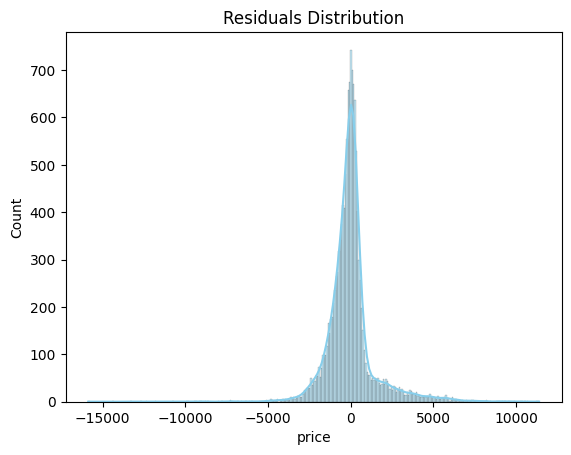

In [ ]:
#1 . Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LinearRegression().fit(X_train, y_train)

# Residuals
residuals = y_test - model.predict(X_test)

# Plot
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.show()


In [ ]:
#2  Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root  Mean Squared Error (RMSE) for a linear regression model.
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Load and prepare data
df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train model
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Squared Error (MSE): 2225535.81
Mean Absolute Error (MAE): 889.33
Root Mean Squared Error (RMSE): 1491.82


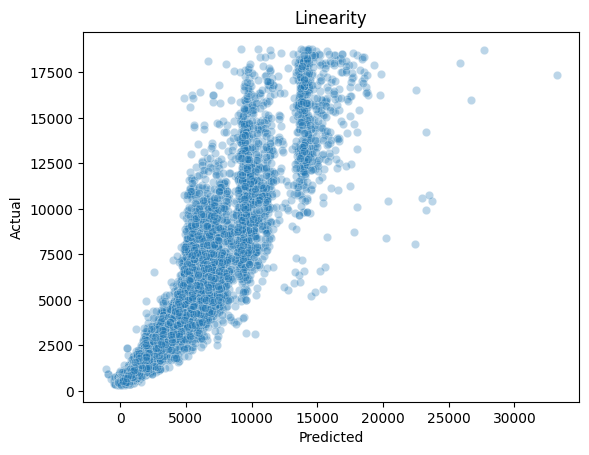

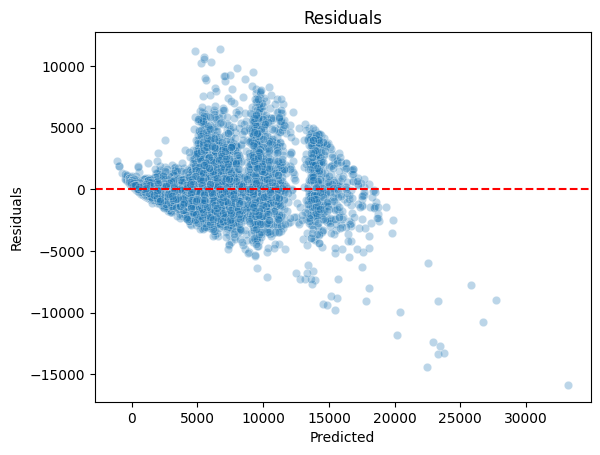

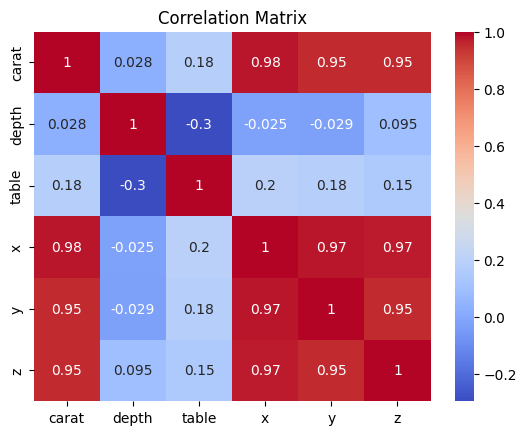

In [ ]:
#3 Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check  linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
import seaborn as sns, matplotlib.pyplot as plt, numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data
df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
res = y_test - y_pred

# Linearity
sns.scatterplot(x=y_pred, y=y_test, alpha=0.3)
plt.title('Linearity'); plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

# Homoscedasticity
sns.scatterplot(x=y_pred, y=res, alpha=0.3)
plt.axhline(0, color='r', ls='--'); plt.title('Residuals'); plt.xlabel('Predicted'); plt.ylabel('Residuals')
plt.show()

# Multicollinearity
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [ ]:
#4 Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load and prepare data
df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=0)
}

# Evaluate models using pipeline
for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('regressor', model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: RMSE = {-np.mean(scores):.2f}")



LinearRegression: RMSE = 1501.08
Ridge: RMSE = 1501.04
RandomForest: RMSE = 1388.43


In [ ]:
#5 Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data and select one feature
df = sns.load_dataset('diamonds').dropna()
X = df[['carat']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Print model details
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {model.score(X_test, y_test):.4f}")


Coefficient: 7745.26
Intercept: -2249.18
R-squared Score: 0.8506


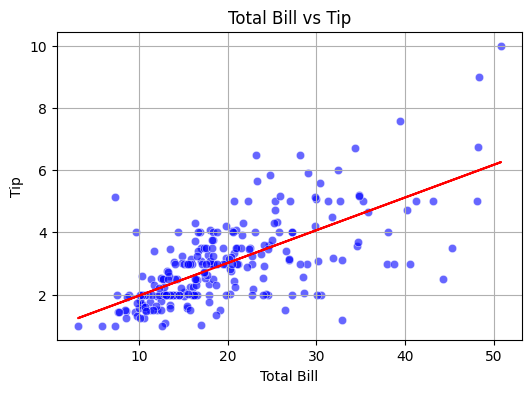

Coefficient: 0.11
Intercept: 0.92
R-squared Score: 0.4566


In [ ]:
#6 . Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

# Fit simple linear regression model
model = LinearRegression().fit(X, y)

# Predict tips
y_pred = model.predict(X)

# Plot actual data and regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue', alpha=0.6)
plt.plot(tips['total_bill'], y_pred, color='red')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()

# Print model details
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {model.score(X, y):.4f}")


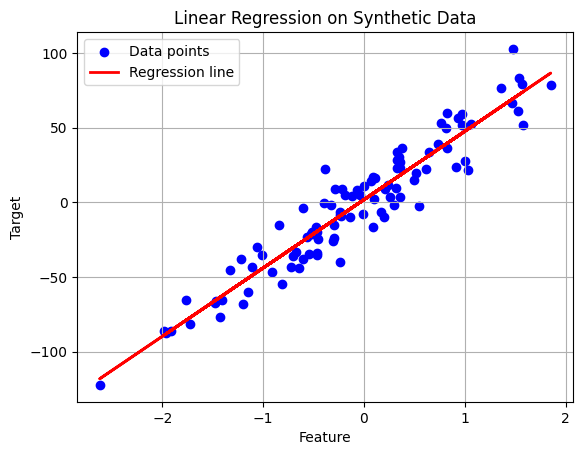

Coefficient: 45.79
Intercept: 1.75


In [ ]:
#7 Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Fit linear regression
model = LinearRegression().fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

# Print model details
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


In [ ]:
#8 Write a Python script that pickles a trained linear regression model and saves it to a file.
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
df = sns.load_dataset('tips').dropna()
X = df[['total_bill']]
y = df['tip']

# Train model
model = LinearRegression().fit(X, y)

# Save (pickle) the model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully as 'linear_model.pkl'")


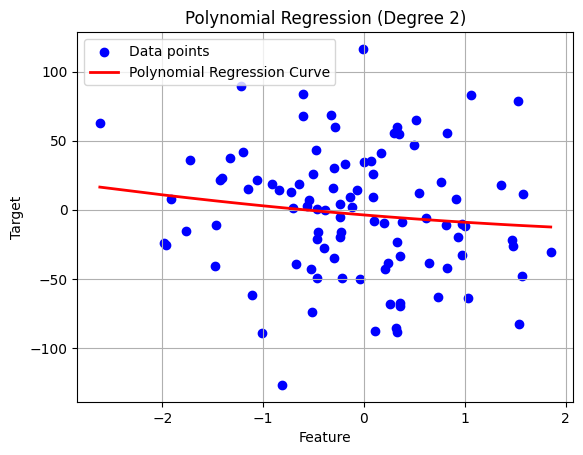

In [ ]:
#9 Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = np.sort(X, axis=0)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot data and regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#10  Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate random synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)  # y = 4 + 3X + noise

# Fit linear regression
model = LinearRegression().fit(X, y)

# Print model details
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Coefficient: 2.77
Intercept: 4.22


Degree 1: R-squared = 0.9198
Degree 2: R-squared = 0.9541
Degree 3: R-squared = 0.9543


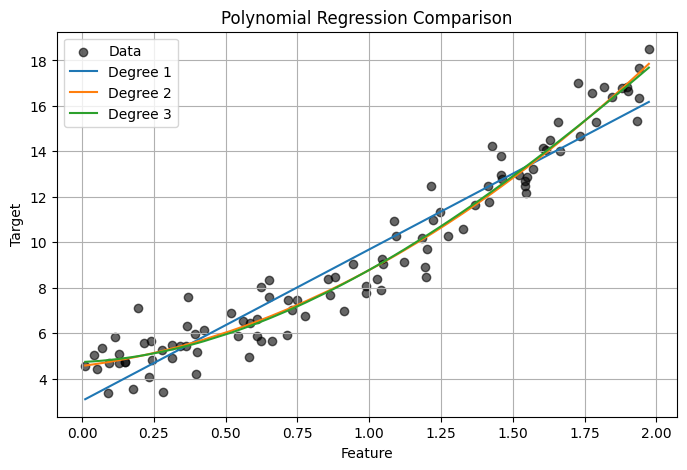

In [ ]:
#11  Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and  compares their performance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + 2 * X[:, 0]**2 + np.random.randn(100)  # Quadratic relationship

# Degrees to test
degrees = [1, 2, 3]
models = {}

# Fit models and plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='black', label='Data', alpha=0.6)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    models[degree] = r2_score(y, y_pred)
    # Sort for smooth curve
    X_sorted, y_pred_sorted = zip(*sorted(zip(X[:, 0], y_pred)))
    plt.plot(X_sorted, y_pred_sorted, label=f'Degree {degree}')

# Display R2 scores
for d, r2 in models.items():
    print(f"Degree {d}: R-squared = {r2:.4f}")

plt.title('Polynomial Regression Comparison')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#12  Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = sns.load_dataset('diamonds').dropna()

# Select two features
X = df[['carat', 'depth']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Print model details
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {model.score(X_test, y_test):.4f}")


Coefficients: [7753.83407977 -100.6321673 ]
Intercept: 3958.51
R-squared Score: 0.8521


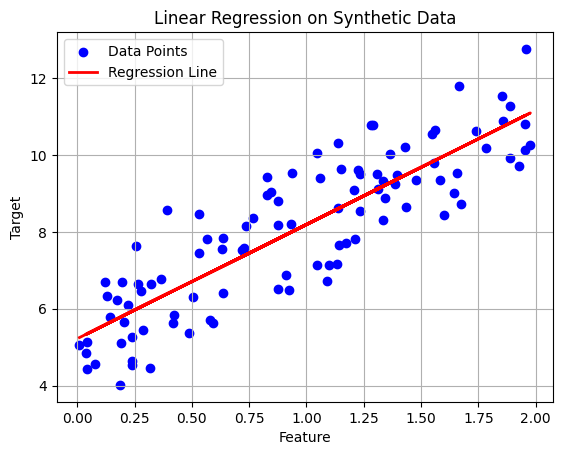

In [ ]:
#13 . Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 5 + 3 * X[:, 0] + np.random.randn(100)  # y = 5 + 3X + noise

# Fit linear regression model
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot data and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#14 . Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset  with multiple features
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load dataset and select features
df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Add constant term for intercept
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


  Feature          VIF
0   const  4821.696350
1   carat    21.602712
2   depth     1.496590
3   table     1.143225
4       x    56.187704
5       y    20.454295
6       z    23.530049


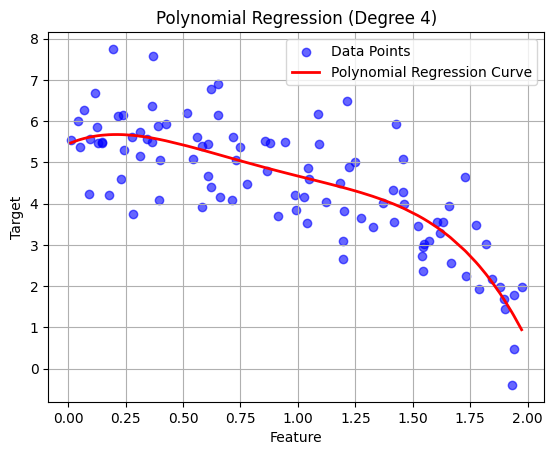

In [ ]:
#15 Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 5 + 2*X[:, 0] - 3*X[:, 0]**2 + 1.5*X[:, 0]**3 - 0.5*X[:, 0]**4 + np.random.randn(100)

# Create polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot data points and regression curve
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
# Sort for a smooth curve
X_sorted, y_pred_sorted = zip(*sorted(zip(X[:, 0], y_pred)))
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#16 import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load dataset
df = sns.load_dataset('diamonds').dropna()

# Select features and target variable
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standardization and linear regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the R-squared score
r2_score = pipeline.score(X_test, y_test)
print(f"R-squared Score: {r2_score:.4f}")


R-squared Score: 0.8590


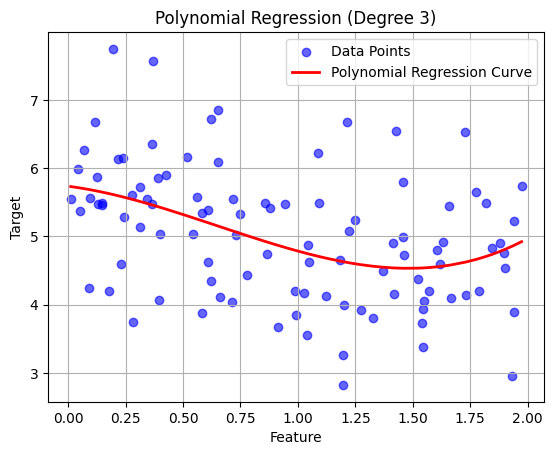

In [ ]:
#17Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the  regression curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data with a cubic relationship
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 5 + 2*X[:, 0] - 3*X[:, 0]**2 + X[:, 0]**3 + np.random.randn(100)

# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot data points and regression curve
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
# Sort for smooth curve
X_sorted, y_pred_sorted = zip(*sorted(zip(X[:, 0], y_pred)))
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#18 Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print  the R-squared score and model coefficients.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 + 2*X[:, 0] + 5*X[:, 1] - 7*X[:, 2] + 1.5*X[:, 3] + 4*X[:, 4] + np.random.randn(100)  # Linear relation with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit multiple linear regression model
model = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2_score = model.score(X_test, y_test)

# Print model details
print(f"R-squared Score: {r2_score:.4f}")
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")


R-squared Score: 0.8394
Model Coefficients: [ 1.65295867  4.76607667 -6.35209671  1.6455846   3.55435983]
Intercept: 3.15


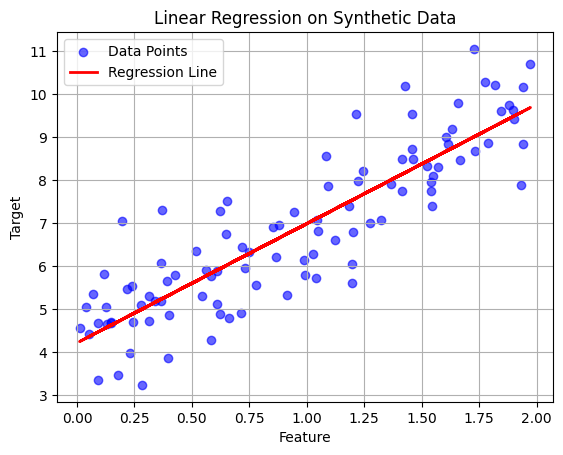

In [ ]:
#19  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the  data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X[:, 0] + np.random.randn(100)  # y = 4 + 3X + noise

# Fit linear regression model
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
 #20 Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.
 import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with 3 features
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 5 + 2*X[:, 0] + 3*X[:, 1] - 4*X[:, 2] + np.random.randn(100)  # Linear relation with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit multiple linear regression model
model = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2_score = model.score(X_test, y_test)

# Print model details
print(f"R-squared Score: {r2_score:.4f}")
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")


R-squared Score: 0.4084
Model Coefficients: [ 2.10589767  2.92460599 -3.31394075]
Intercept: 4.91


In [ ]:
#21 Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.
import numpy as np
from sklearn.linear_model import LinearRegression
import joblib

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X[:, 0] + np.random.randn(100)  # y = 4 + 3X + noise

# Train the model
model = LinearRegression().fit(X, y)

# Serialize (save) the model to a file
joblib.dump(model, 'linear_regression_model.joblib')

print("Model saved successfully!")


Model saved successfully!


In [ ]:
#22  Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the Seaborn 'tips' dataset
df = sns.load_dataset('tips')

# Select features (including categorical) and target variable
X = df[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = df['tip']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for one-hot encoding and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time']),  # Apply OneHotEncoder to categorical columns
            ('num', 'passthrough', ['total_bill'])  # Keep 'total_bill' as it is (numerical)
        ]
    )),
    ('regressor', LinearRegression())  # Apply linear regression
])

# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Print model coefficients (for the numerical features)
print("Model coefficients (for numerical features):", pipeline.named_steps['regressor'].coef_)

# R-squared score
r2_score = pipeline.score(X_test, y_test)
print(f"R-squared Score: {r2_score:.4f}")


Mean Squared Error: 0.6533
Model coefficients (for numerical features): [-0.01142836  0.01142836  0.12948735 -0.12948735  0.06222575 -0.0614069
  0.12868034 -0.12949919 -0.09320812  0.09320812  0.1092622 ]
R-squared Score: 0.4774


In [ ]:
#23 Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 5 + 2*X[:, 0] + 3*X[:, 1] - 4*X[:, 2] + 1.5*X[:, 3] + 4*X[:, 4] + np.random.randn(100)  # Linear relation with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the models
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r2_lin = lin_reg.score(X_test, y_test)
r2_ridge = ridge_reg.score(X_test, y_test)

# Print the results
print("Linear Regression:")
print(f"Coefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_:.2f}")
print(f"R-squared Score: {r2_lin:.4f}")
print(f"Mean Squared Error: {mse_lin:.4f}\n")

print("Ridge Regression:")
print(f"Coefficients: {ridge_reg.coef_}")
print(f"Intercept: {ridge_reg.intercept_:.2f}")
print(f"R-squared Score: {r2_ridge:.4f}")
print(f"Mean Squared Error: {mse_ridge:.4f}")


Linear Regression:
Coefficients: [ 1.65295867  2.76607667 -3.35209671  1.6455846   3.55435983]
Intercept: 5.15
R-squared Score: 0.7494
Mean Squared Error: 0.9759

Ridge Regression:
Coefficients: [ 1.45903296  2.35731304 -2.95595455  1.58656836  3.12987056]
Intercept: 5.48
R-squared Score: 0.7268
Mean Squared Error: 1.0640


In [ ]:
#24  Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate a synthetic dataset
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation and compute the R-squared scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the results
print("Cross-validation R-squared scores:", cv_scores)
print(f"Mean R-squared score: {cv_scores.mean():.4f}")
print(f"Standard deviation of R-squared scores: {cv_scores.std():.4f}")


Cross-validation R-squared scores: [0.99999931 0.99999901 0.99999977 0.99999917 0.99999934]
Mean R-squared score: 1.0000
Standard deviation of R-squared scores: 0.0000


In [ ]:
#25  Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100) * 10  # y = 2X^2 + 3X + 5 + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a function to train and evaluate polynomial regression models
def evaluate_polynomial_model(degree):
    # Transform the features into polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit a linear regression model on the polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_poly_test)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    return r2, model.coef_

# Compare polynomial regression models of different degrees
for degree in range(1, 6):
    r2, coef = evaluate_polynomial_model(degree)
    print(f"Degree {degree}: R-squared Score = {r2:.4f}")
    print(f"Coefficients for Degree {degree}: {coef}\n")


Degree 1: R-squared Score = 0.9626
Coefficients for Degree 1: [[ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.51718229]
 [ 0.         22.517